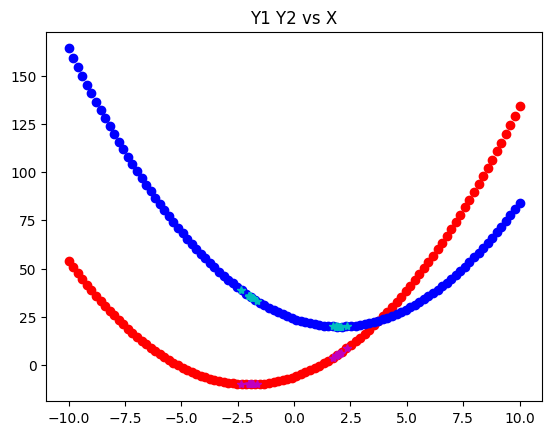

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

DOMAIN = [-10,10]
MAX_GENERATIONS = 100
PROB_MUTATE = 0.05
POP_SIZE = 100


class Individual:
    #self.prob_mutate = 0.05
    def __init__(self,id_,gene=None):
        self.id = id_
        if gene==None:
            self.gene = random.uniform(DOMAIN[0],DOMAIN[1])
        else:
            self.gene = gene
        self.fitness = None
        self.y1 = None
        self.y2 = None
    def mutate(self):
        if random.random() < PROB_MUTATE:
            perturbation = random.uniform(-1,1)
            ''' Mutate on +-1'''
            self.gene = self.gene + perturbation
    def get_gene(self):
        return self.gene
    def crossover(self,other):
        ''' Average on both individuals'''
        gene = (self.get_gene()  + other.get_gene())*0.5
        global ID
        new_ind = Individual(ID,gene)
        ID = ID+1
        return new_ind
    def evaluate(self):
        self.y1 = (self.gene+2)**2 - 10
        self.y2 = (self.gene-2)**2 + 20
    def show(self):
        print(self.gene)
''' Helper, only for displaying purposes'''
def f(x):
    y1 = (x+2)**2 - 10
    y2 = (x-2)**2 + 20
    return(y1,y2)
''' Plot both functions'''
def plotF():
    X = np.linspace(-10.0, 10.0, num=100)
    Y_1= []
    Y_2= []
    for x in X:
        (y1,y2) = f(x)
        Y_1.append(y1)
        Y_2.append(y2)
    plt.title("Y1 Y2 vs X")
    plt.plot(X,Y_1,'ro')
    plt.plot(X,Y_2,'bo')
ID = 0
def generatePopulation(n):
    global ID
    population = []
    for i in range(n):
        x = Individual(ID)
        ID = ID+1
        population.append(x)
    return population
population = generatePopulation(POP_SIZE)
''' 25% of all population'''
num_offsprings = int(0.25*len(population))
''' Iterate over all generations'''
for generation in range(MAX_GENERATIONS+1):
    new_pop = []
    f1 = []
    f2 = []
    ''' Evalua ambas funciones'''
    for individual in population:
        individual.evaluate()
        ##print("id: %f --- y1: %f"%(individual.id,individual.y2))
        f1.append((individual.id,individual.y1))
        f2.append((individual.id,individual.y2))
    #population.sort(key=lambda x: x.fitness)
    ''' Sort f1 and f2 by its individual f1 score'''
    f1.sort(key=lambda x: x[1])
    f2.sort(key=lambda x: x[1])
    for individual in population:
        f1_place = 0
        f2_place = 0
        for i in range(len(f1)):
            if individual.id == f1[i][0]:
                f1_place = i+1
                break
        for i in range(len(f2)):
            if individual.id == f2[i][0]:
                f2_place = i+1
                break
        individual.fitness = 1/f1_place + 1/f2_place
    population.sort(key=lambda x: x.fitness, reverse=True)
    if generation == MAX_GENERATIONS:
        break
    #num_offsprings = int(0.25*len(population))
    index = 0
    while len(new_pop) < num_offsprings:
        candidate = population[index]
        new_offspring = candidate.crossover(population[index+1])
        new_offspring.mutate()
        new_pop.append(new_offspring)
        index = index+2
    last = len(population)-len(new_pop)
    population = new_pop + population[:last]
plotF()
''' Plot best results'''
for i in range(num_offsprings):
    plt.plot(population[i].gene,population[i].y1,'m*')
    plt.plot(population[i].gene,population[i].y2,'c*')
#print(population[:num_offsprings])